In [1]:
from geopy.distance import geodesic
from sklearn.manifold import MDS
import numpy as np
import matplotlib.pyplot as plt

In [15]:
# 定義各個火車站的經緯度
stations = {
    'Zhiben_station': (22.710462343537316, 121.06075403254081),
    'Yuli_station': (23.331776118351787, 121.31165562340392),
    'Kaohsiung_station': (22.6396706176077, 120.30261518317573), 
    'Douliu_station': (23.712201175089422, 120.54104266971164),
    'Taichung_station': (24.137523918186687, 120.68683583244295),
    'Hsinchu_staion': (24.801750331885113, 120.9716203981461),
    'Tapei_staion': (25.047637204053995, 121.5171273798563)
}

In [17]:
# 获取车站名称列表
station_names = list(stations.keys())

# 计算距离矩阵
distance_matrix = np.zeros((len(station_names), len(station_names)))
for i, station1 in enumerate(station_names):
    for j, station2 in enumerate(station_names):
        if i != j:
            distance_matrix[i, j] = geodesic(stations[station1], stations[station2]).kilometers

In [18]:
# 使用MDS进行降维
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=42)
mds_coords = mds.fit_transform(distance_matrix)

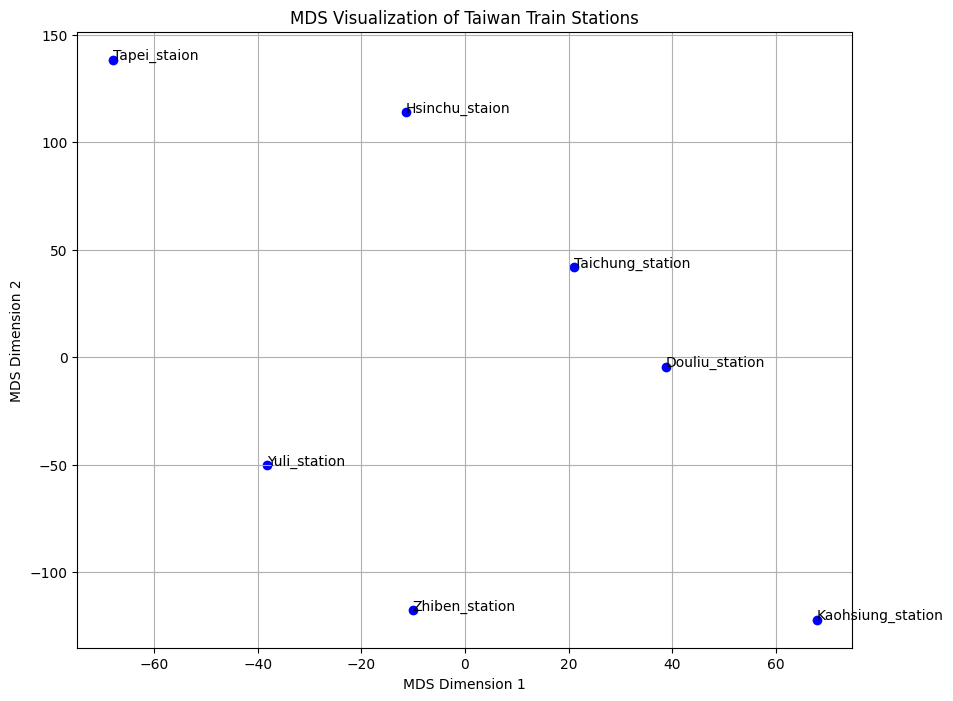

In [19]:
# 可视化结果
plt.figure(figsize=(10, 8))
plt.scatter(mds_coords[:, 0], mds_coords[:, 1], color='blue')

# 标注每个点
for i, name in enumerate(station_names):
    plt.text(mds_coords[i, 0], mds_coords[i, 1], name)

plt.title('MDS Visualization of Taiwan Train Stations')
plt.xlabel('MDS Dimension 1')
plt.ylabel('MDS Dimension 2')
plt.grid(True)
plt.show()

In [20]:
import gmplot

# 設置谷歌地圖API密鑰
apikey = " "

# 創建GoogleMapPlotter對象並設置初始中心點和縮放級別
gmap = gmplot.GoogleMapPlotter(24, 121, 7, apikey=apikey)
# 定義要標記的車站坐標
station_coords = [
    (25.047924, 121.517491), # 台北車站
    (24.805832, 120.968798), # 新竹車站
    (24.137611, 120.685417), # 台中車站
    (23.711975, 120.427538), # 斗六車站
    (22.629611, 120.301388), # 高雄車站
    (23.33825, 121.454262),  # 花蓮車站
    (22.756391, 121.103889)  # 台東車站
]

# 遍歷所有車站坐標並在地圖上標記
for coord in station_coords:
    gmap.marker(coord[0], coord[1], color='cornflowerblue')

# 繪製地圖並保存為HTML文件
gmap.draw('stations_map.html')